# Notebook: Quick Sort
## Author: Lincoln Steber
## Course: CS 2500 (Algorithms) @ Missouri S&T

### Prerequisite Packages

We will be using numpy, matplotlib library in this jupyter notebook.

In [13]:
# Install all the prerequisite packages from the Terminal
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import time
import numpy as np
import matplotlib.pyplot as plt

## Quick Sort with print statements

In [15]:
def partition_print(A, p, r):
    x = A[r]
    i = p - 1
    for j in range(p, r):
        if A[j] < x:
            i += 1
            A[i], A[j] = A[j], A[i]
            if A[i] != A[j]:
                print(f"Swaped: A[%2d]: %2d  and  A[%2d]: %2d  |  Array: {A}" % (i, A[i], j, A[j]))
    A[i + 1], A[r] = A[r], A[i + 1]
    if A[i + 1] != A[r]:
        print(f"Swaped: A[%2d]: %2d  and  A[%2d]: %2d  |  Array: {A}" % (i + 1, A[i + 1], r, A[r]))
    return i + 1

In [16]:
def quick_sort_print(A, p, r):
    if p < r:
        q = partition_print(A, p, r)
        quick_sort_print(A, p, q - 1)
        quick_sort_print(A, q + 1, r)
    return A

## Check that the array is sorted correctly

In [17]:
def is_sorted(array):
    len_array = len(array)
    status = True
    i = 0
    while (i<len_array-1):
        if (array[i]>array[i+1]):
            status = False
        i = i + 1
    if (not status):
        print("Array is not sorted \n")
    else:
        print("Array is sorted \n")

## Test input for quick_sort_print and is_sorted functions

In [24]:
array =  [2, 5, 3, 1, 4]

print(f"Input : {array}")
is_sorted(array)

array_out = quick_sort_print(array, 0, len(array) - 1)

print(f"\nOutput : {array}")
is_sorted(array_out)

Input : [2, 5, 3, 1, 4]
Array is not sorted 

Swaped: A[ 1]:  3  and  A[ 2]:  5  |  Array: [2, 3, 5, 1, 4]
Swaped: A[ 2]:  1  and  A[ 3]:  5  |  Array: [2, 3, 1, 5, 4]
Swaped: A[ 3]:  4  and  A[ 4]:  5  |  Array: [2, 3, 1, 4, 5]
Swaped: A[ 0]:  1  and  A[ 2]:  2  |  Array: [1, 3, 2, 4, 5]
Swaped: A[ 1]:  2  and  A[ 2]:  3  |  Array: [1, 2, 3, 4, 5]

Output : [1, 2, 3, 4, 5]
Array is sorted 



## Plotting Run-Time Complexity

In [19]:
def partition(A, p, r):
    x = A[r]
    i = p - 1
    for j in range(p, r):
        if A[j] < x:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i + 1], A[r] = A[r], A[i + 1]
    return i + 1

In [20]:
def quick_sort(A, p, r):
    if p < r:
        q = partition(A, p, r)
        quick_sort(A, p, q - 1)
        quick_sort(A, q + 1, r)
    return A

In [21]:
# Generate a random array of given size.
def generate_random_input(size):
    arr = np.random.randint(0, 20000, size = size)
    return arr

In [22]:
# Number of random arrays generated in this experiment
monte_carlo_runs = 500

# Range of array sizes considered
start_array = 10
end_array = 200
increments = 10

# Initiate average and worst case run-time
avg_time_taken = [0]*(end_array//increments)
worst_time_taken = [0]*(end_array//increments)

# Run-time experiments for random arrays of a given size
count = 0
for curr_array_size in range(start_array, end_array+1, increments):  
    run_times = []
    # Given a fixed array size, generate one random array and compute its run-time
    for iteration in range(monte_carlo_runs):             
        array = generate_random_input(curr_array_size)    # Generate random array
        start = time.time()                               # Record state time
        quick_sort(array, 0, len(array) - 1)
        end = time.time()                                 # Record end time
        run_times.append(end - start)                     # Instantaneous ruun-time for a specific random input         

    avg_time_taken[count] = sum(run_times)/len(run_times) # Empirical average of run-time
    worst_time_taken[count] = max(run_times)              # Worst case run time across various random experiments
    count += 1
#print(time_taken)

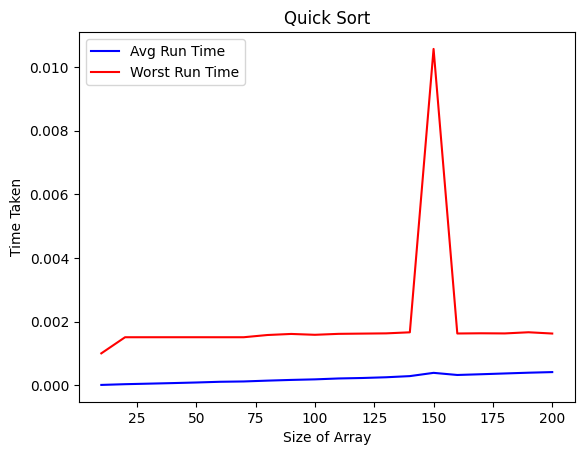

In [23]:
# Data Coordinates
x = np.arange(start_array, end_array+1, increments)
y = np.array(avg_time_taken)
z = np.array(worst_time_taken)

# Plot
plt.plot(x,y,'b',label='Avg Run Time') 
plt.plot(x,z,'r',label='Worst Run Time') 

# Add Title
plt.title("Quick Sort")

# Add Axes Labels
plt.xlabel("Size of Array") 
plt.ylabel("Time Taken") 

# Display
plt.legend()
plt.show()

### References
1. [Big o cheat sheet](https://www.bigocheatsheet.com/)
2. [Timeit example](https://www.geeksforgeeks.org/timeit-python-examples/)